# Titanic - kNN

In [4]:
import os
os.chdir('/Users/alexsutherland/Documents/Programming/Python/Kaggle/Titanic---2015')

import TitanicPreprocessor as tp
import TitanicPredictor as tpred
import sklearn.neighbors as skl_neighbors
from sklearn.grid_search import GridSearchCV
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

X_train, y_train, X_test, X_test_ids = tp.getData()

In [9]:
knn_clf = skl_neighbors.KNeighborsClassifier()

knn_gs_params = [
    {'n_neighbors': [2,4,6,10,15,25], 
     'weights': ['uniform','distance'], 
     'algorithm': ['auto','kd_tree','brute'], 
     'leaf_size': [5,10,20,30], 
     'p': [1,2,3,4]}
]

gs_knn_clf = GridSearchCV(knn_clf, param_grid = knn_gs_params, cv=10)
gs_knn_clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [2, 4, 6, 10, 15, 25], 'weights': ['uniform', 'distance'], 'leaf_size': [5, 10, 20, 30], 'algorithm': ['auto', 'kd_tree', 'brute'], 'p': [1, 2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [10]:
gs_knn_clf_results = []
for params, mean_score, scores in gs_knn_clf.grid_scores_:
    print('Score: %0.3f+/-%0.2f %r' % (mean_score, np.std(scores), params))
    gs_knn_clf_results.append([params['n_neighbors'], params['algorithm'], params['weights'], params['leaf_size'], params['p'], mean_score, np.std(scores)])
gs_knn_clf_results_df = pd.DataFrame(gs_knn_clf_results)
gs_knn_clf_results_df.head()

Score: 0.717+/-0.04 {'n_neighbors': 2, 'weights': 'uniform', 'leaf_size': 5, 'algorithm': 'auto', 'p': 1}
Score: 0.718+/-0.04 {'n_neighbors': 2, 'weights': 'distance', 'leaf_size': 5, 'algorithm': 'auto', 'p': 1}
Score: 0.700+/-0.04 {'n_neighbors': 2, 'weights': 'uniform', 'leaf_size': 5, 'algorithm': 'auto', 'p': 2}
Score: 0.703+/-0.04 {'n_neighbors': 2, 'weights': 'distance', 'leaf_size': 5, 'algorithm': 'auto', 'p': 2}
Score: 0.686+/-0.04 {'n_neighbors': 2, 'weights': 'uniform', 'leaf_size': 5, 'algorithm': 'auto', 'p': 3}
Score: 0.697+/-0.04 {'n_neighbors': 2, 'weights': 'distance', 'leaf_size': 5, 'algorithm': 'auto', 'p': 3}
Score: 0.686+/-0.04 {'n_neighbors': 2, 'weights': 'uniform', 'leaf_size': 5, 'algorithm': 'auto', 'p': 4}
Score: 0.694+/-0.04 {'n_neighbors': 2, 'weights': 'distance', 'leaf_size': 5, 'algorithm': 'auto', 'p': 4}
Score: 0.737+/-0.02 {'n_neighbors': 4, 'weights': 'uniform', 'leaf_size': 5, 'algorithm': 'auto', 'p': 1}
Score: 0.731+/-0.03 {'n_neighbors': 4, 'we

,0,1,2,3,4,5,6
0,2,auto,uniform,5,1,0.717172,0.037138
1,2,auto,distance,5,1,0.718294,0.040697
2,2,auto,uniform,5,2,0.700337,0.040034
3,2,auto,distance,5,2,0.702581,0.042687
4,2,auto,uniform,5,3,0.685746,0.042259


In [11]:
gs_knn_clf_results_df.columns = ['n_neighbors','algorithm','weights','leaf_size','p','mean_score','score_std']

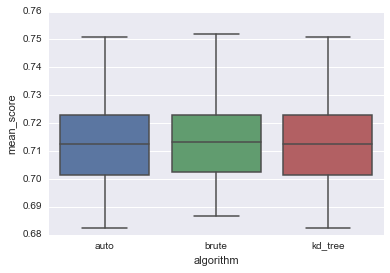

In [13]:
sns.boxplot(gs_knn_clf_results_df['mean_score'], groupby=gs_knn_clf_results_df['algorithm'])

The algorithm doesn't look to make a big difference

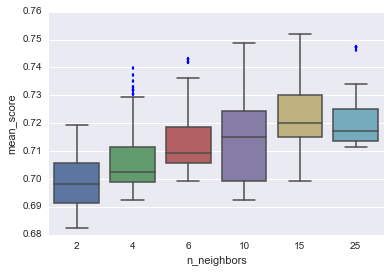

In [14]:
sns.boxplot(gs_knn_clf_results_df['mean_score'], groupby=gs_knn_clf_results_df['n_neighbors'])

The number of neighbors definitely makes a difference. Higher numbers are definitely better. This should be investigated further.

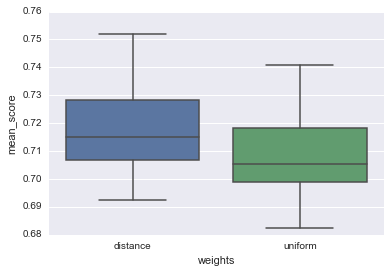

In [15]:
sns.boxplot(gs_knn_clf_results_df['mean_score'], groupby=gs_knn_clf_results_df['weights'])

Distance weights are better than uniform.

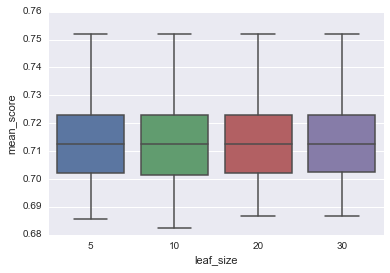

In [16]:
sns.boxplot(gs_knn_clf_results_df['mean_score'], groupby=gs_knn_clf_results_df['leaf_size'])

Leaf_size doesn't influence the results

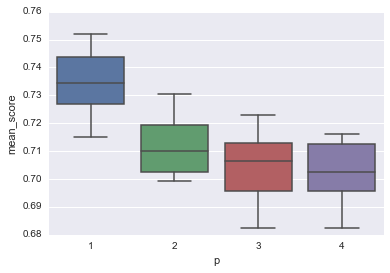

In [17]:
sns.boxplot(gs_knn_clf_results_df['mean_score'], groupby=gs_knn_clf_results_df['p'])

Manhattan distance seems to be the optimum

#### Optimized knn grid search

In [ ]:
knn_clf = skl_neighbors.KNeighborsClassifier(weights='distance', p=1)

knn_gs_opt_params = [
    {'n_neighbors': np.arange(5,40)
    }
]

gs_opt_knn_clf = GridSearchCV(knn_clf, param_grid = knn_gs_opt_params, cv=10)
gs_opt_knn_clf.fit(X_train, y_train)

gs_opt_knn_clf_results = []
for params, mean_score, scores in gs_opt_knn_clf.grid_scores_:
    #print('Score: %0.3f+/-%0.2f %r' % (mean_score, np.std(scores), params))
    gs_opt_knn_clf_results.append([params['n_neighbors'], mean_score, np.std(scores)])
gs_opt_knn_clf_results_df = pd.DataFrame(gs_opt_knn_clf_results)
gs_opt_knn_clf_results_df.columns = ['n_neighbors','mean_score','score_std']

(0.72, 0.76)

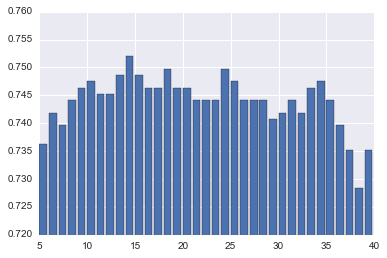

In [27]:
plt.bar(gs_opt_knn_clf_results_df['n_neighbors'], gs_opt_knn_clf_results_df['mean_score'])
ax = plt.gca()
ax.set_ylim([0.72,0.76])

The optimum amount of neighbors seems to be ~14

In [28]:
knn_opt_clf = skl_neighbors.KNeighborsClassifier(weights='distance', p=1, n_neighbors=14)

knn_opt_clf.fit(X_train, y_train)

tpred.predictAndExport(knn_opt_clf, X_test, X_test_ids)